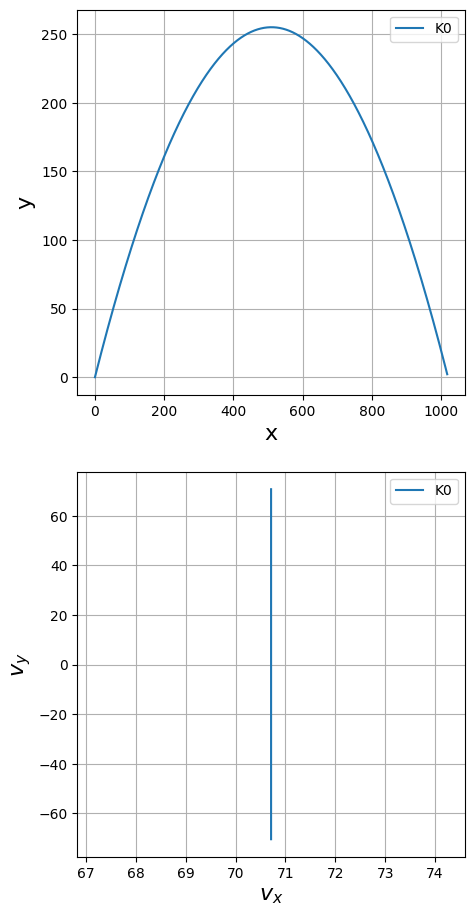

In [6]:
# Exercise 7.2
# Author: Felix Cahyadi
# Date: 30.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# define the function for acceleration
# We are going to store the position, velocity, and acceleration data in mxn array where m is the number of particles and n is the number of dimension

def accel(x_arr, m_arr, G = 1.0):
    """This is a function that calculates the gravitational acceleration for each particle

    Args:
        x_arr (NDarray): mxn matrix, m is the number of body, and n is the number of dimension
        m_arr (NDarray): array containing the masses of the bodies
        G (float, optional): The gravitational constant. Defaults to 1.0

    Returns:
        acc_arr: An array of mxn size containing acceleration
    """
    
    # define the array for the acceleration
    acc_arr = np.zeros_like(x_arr)

    # calculate the force
    num_particles = len(m_arr) # Get the number of particles involved
    for i in range(num_particles): # This is the particle that receives the gravitational force
        for j in range(num_particles): # This is the particle that "gives" the gravitational force
            if i !=j:
                delta_x = x_arr[i] - x_arr[j] # Position of i w.r.t j
                acc_arr[i] = acc_arr[i] -(G*m_arr[j])*(delta_x/(norm(delta_x,2)**3)) # The gravitational acceleration
    
    return acc_arr

def grav(x_arr, m_arr):
    return np.array([[0,-9.8]])

def integrator(func, x_arr0, v_arr0, t_arr, m_arr):
    """This is a function to calculate the trajectory based known force and positions

    Args:
        func (function): Function that describes the acceleration of the bodies
        x_arr0 (NDarray): NumPy array containing the positions of the bodies
        v_arr0 (NDarray): NumPy array containing the velocities of the bodies
        t_arr (NDarray): NumPy array containing the time array
        m_arr (NDarray): array containing the masses of the bodies

    Returns:
        x_arr, v_arr: The positions and velocities of the bodies.
    """
    # Determine the time step
    dt = t_arr[1] - t_arr[0]
    
    # Create array to store x_arr and v_arr
    x_arr = np.zeros(shape = (x_arr0.shape[0], x_arr0.shape[1], len(t_arr)))
    v_arr = np.zeros(shape = (v_arr0.shape[0], v_arr0.shape[1], len(t_arr)))
    x_arr[...,0] = x_arr0 # Putting in the initial values
    v_arr[...,0] = v_arr0 # Same thing for velocity

    for i in range(1,len(t_arr)):
        # This is using verlet velocity integration
        a_now = func(x_arr[...,i-1], m_arr)
        x_arr[...,i] = x_arr[...,i-1] + v_arr[...,i-1]*dt + 0.5*a_now*(dt**2)
        a_next = func(x_arr[...,i], m_arr)
        v_arr[...,i] = v_arr[...,i-1] + ((a_now + a_next)/2)*dt

    return x_arr, v_arr

# initiate the condition
N_steps = 25000 # number of steps
#m_arr = np.array([1000.0,1.0,0.01]) # the masses of the bodies
m_arr = np.array([1000])
t_arr = np.linspace(0,14.4,N_steps) # time array
#x_arr0 = np.array([[0,0],[150,0],[155,0]]) # Initial positions of the bodies
#v_arr0 = np.array([[0,0],[0,2.5],[0,2.90]]) # Initial velocities of the bodies

v0 = 100
theta = 45
x_arr0 = np.array([[0,0]])
v_arr0 = np.array([[v0*np.cos(np.deg2rad(theta)), v0*np.sin(np.deg2rad(theta))]])

#labels = ["K0", "K1", "K2"] # labels for the plot

labels = ["K0", "K1", "K2"] # labels for the plot
ax_labels = [["x", "y"], ["$v_x$","$v_y$"]] # axis labels for the plot

# Getting the solution
solution = integrator(grav, x_arr0, v_arr0, t_arr, m_arr)

# Visualize the solution
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (5,11))

for i, traj_all in enumerate(solution):
    for j, traj in enumerate(traj_all):
        ax[i].plot(traj[0,:], traj[1,:], label = labels[j])
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_xlabel(ax_labels[i][0], fontsize = 16)
    ax[i].set_ylabel(ax_labels[i][1], fontsize = 16)

# Visualize the distance between bodies K1 and K2
# Get positions from the solution
#pos = solution[0]

# Get K1 and K2 positions
#K1_pos = pos[1]
#K2_pos = pos[2]
# Get K1 position relative to K2
#rel_pos = K1_pos - K2_pos
# Get the distances over time
#dist_over_time = norm(rel_pos, ord = 2, axis=0)


#fig2, ax2 = plt.subplots(figsize = (9,5))
#ax2.plot(t_arr, dist_over_time)
#ax2.grid(True)
#ax2.set_xlim((t_arr[0],t_arr[-1]))
#ax2.set_xlabel("Time", fontsize = 16)
#ax2.set_ylabel("Distance", fontsize = 16)
#plt.show()

